# RR Harjoitus1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    data = pd.read_csv("csv-cb79368e-42e0-42c8-a1da-fbfbaa9f0c22.csv",skiprows = [1])
    print("Tiedoston lukeminen onnistui")
except:
    print("Tiedoston lukeminen ei onnistunut")

Tiedoston lukeminen onnistui


In [5]:
data.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,UV-B-säteily (index)
0,2021,4,12,01:00,UTC,0.0
1,2021,4,12,02:00,UTC,0.0
2,2021,4,12,03:00,UTC,0.0
3,2021,4,12,04:00,UTC,0.1
4,2021,4,12,05:00,UTC,0.1


In [6]:
klo = data["Klo"]
UV = data["UV-B-säteily (index)"]

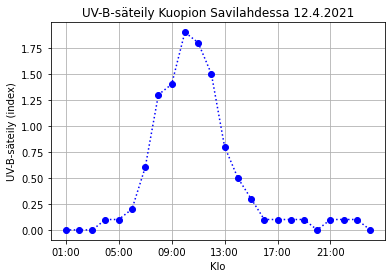

In [7]:
plt.plot(klo,UV, 'b:',marker='o')
plt.xlabel('Klo') 
plt.ylabel('UV-B-säteily (index)')
plt.title('UV-B-säteily Kuopion Savilahdessa 12.4.2021')
plt.xticks(np.arange(0, 24, step=4))
plt.grid(True)
plt.show() 

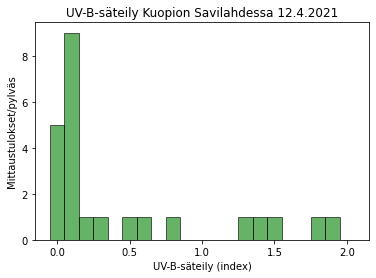

In [8]:
plt.hist(UV, bins=21, range=(-0.05,2.05), facecolor='green', edgecolor='black', alpha=0.6, linewidth=1)
plt.xlabel('UV-B-säteily (index)') 
plt.ylabel('Mittaustulokset/pylväs')
plt.title('UV-B-säteily Kuopion Savilahdessa 12.4.2021')
plt.show() 

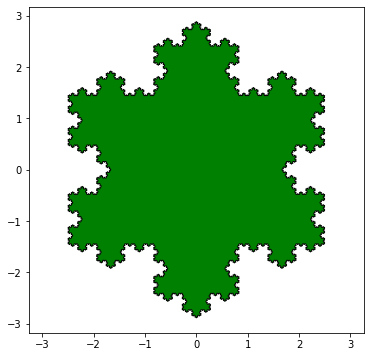

In [9]:
# koch_snowflake koodi kopioitu sivulta 
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill.html#sphx-glr-gallery-lines-bars-and-markers-fill-py 

import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(order, scale=5):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(6, 6))
plt.axis('equal')
plt.fill(x, y, facecolor='green', edgecolor='black')
plt.show()

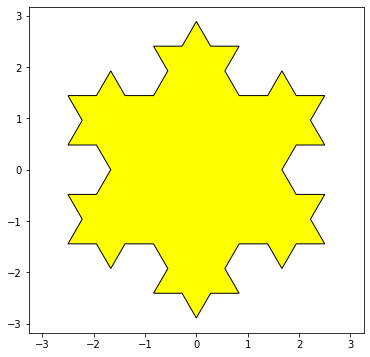

Toistoja 3 kertaa, skaalaus 5 ja kuvion väri on 'yellow'


In [10]:
scale=5
toistot=3
väri='yellow'

for order in range(toistot):
    if order == 0:
        # initial triangle
        angles = np.array([0, 120, 240]) + 90
        apu=scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
    else:
        ZR = 0.5 - 0.5j * np.sqrt(3) / 3
        p1 = apu  # start points
        p2 = np.roll(p1, shift=-1)  # end points
        dp = p2 - p1  # connection vectors
        new_points = np.empty(len(p1) * 4, dtype=np.complex128)
        new_points[::4] = p1
        new_points[1::4] = p1 + dp / 3
        new_points[2::4] = p1 + dp * ZR
        new_points[3::4] = p1 + dp / 3 * 2
        apu = new_points
            
    points = apu
    x, y = points.real, points.imag

plt.figure(figsize=(6, 6))
plt.axis('equal')
plt.fill(x, y, facecolor=väri, edgecolor='black')
plt.show()
text1 = "Toistoja {} kertaa".format(toistot)
text2 = "skaalaus {}".format(scale)
print(text1+", "+text2+" ja kuvion väri on '"+väri+"'")


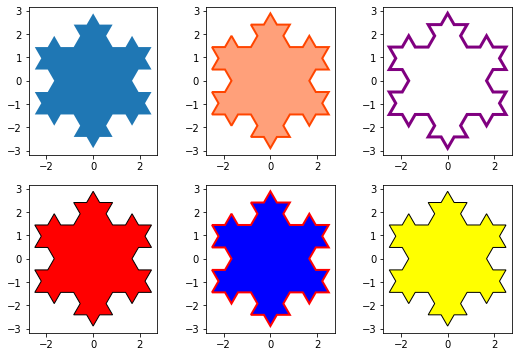

In [11]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(9, 6),subplot_kw={'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor='lightsalmon', edgecolor='orangered', linewidth=2)
ax3.fill(x, y, facecolor='none', edgecolor='purple', linewidth=3)
ax4.fill(x, y, facecolor='red', edgecolor='black', linewidth=1)
ax5.fill(x, y, facecolor='blue', edgecolor='red', linewidth=2)
ax6.fill(x, y, facecolor=väri, edgecolor='black', linewidth=1)
plt.show()